In [29]:
import pandas as pd
import numpy as np


df = pd.read_csv('2017mpi.csv',encoding='gb2312')
df.head()

,name,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,中牟县,0.16,52.9,28,5,1.83,0.03,6,1.66,0.56,17969
1,巩义市,0.15,70.6,44,25,3.71,0.38,11,1.54,0.54,21164
2,荥阳市,0.15,118.2,45,68,4.61,0.12,21,1.40,0.62,18924
3,新密市,0.16,79.3,66,50,3.89,0.14,9,1.67,0.44,18865
4,新郑市,0.14,225.2,53,22,3.34,0.11,7,1.33,0.78,19873


In [30]:
X = df.iloc[:,1:11].values
y = df.iloc[:,10].values

X

array([[1.6000e-01, 5.2900e+01, 2.8000e+01, ..., 1.6600e+00, 5.6000e-01,
        1.7969e+04],
       [1.5000e-01, 7.0600e+01, 4.4000e+01, ..., 1.5400e+00, 5.4000e-01,
        2.1164e+04],
       [1.5000e-01, 1.1820e+02, 4.5000e+01, ..., 1.4000e+00, 6.2000e-01,
        1.8924e+04],
       ...,
       [2.2000e-01, 5.7200e+01, 3.6000e+01, ..., 5.3000e+00, 3.6000e-01,
        1.0984e+04],
       [2.1000e-01, 8.6400e+01, 7.0000e+01, ..., 3.5500e+00, 6.1000e-01,
        1.1494e+04],
       [1.8000e-01, 1.1620e+02, 3.6000e+01, ..., 7.3300e+00, 3.3000e-01,
        1.1159e+04]])

In [31]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.37085692, -0.55523634, -1.42157993, ..., -1.19255639,
         0.440319  ,  1.80225608],
       [-1.66948758,  0.12454412, -0.23575357, ..., -1.25330762,
         0.32252666,  2.94403923],
       [-1.66948758,  1.95265429, -0.16163943, ..., -1.32418407,
         0.79369604,  2.14354024],
       ...,
       [ 0.42092702, -0.39009194, -0.82866675, ...,  0.65023108,
        -0.73760445, -0.69394277],
       [ 0.12229636,  0.7313538 ,  1.69121425, ..., -0.23572444,
         0.73479987, -0.5116863 ],
       [-0.77359561,  1.87584293, -0.82866675, ...,  1.67793947,
        -0.91429296, -0.63140378]])

In [32]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('协方差矩阵 \n%s' %cov_mat)  # 对角线接近1  +代表正相关 -代表负相关

协方差矩阵 
[[ 1.00961538  0.02614264 -0.10092091  0.16209674 -0.16774379  0.02188707
  -0.06447035  0.05312057 -0.09022007 -0.17677953]
 [ 0.02614264  1.00961538  0.02265667  0.09286939  0.40960236  0.02477471
   0.17946453 -0.16604752  0.06386863  0.26934403]
 [-0.10092091  0.02265667  1.00961538 -0.0573115   0.19741365  0.07884608
   0.20040312 -0.34135741  0.25451738  0.15046999]
 [ 0.16209674  0.09286939 -0.0573115   1.00961538  0.13488148  0.01938705
  -0.019538    0.06009375 -0.17168312 -0.11272171]
 [-0.16774379  0.40960236  0.19741365  0.13488148  1.00961538  0.20275623
   0.37646862 -0.56991703  0.27661376  0.62971149]
 [ 0.02188707  0.02477471  0.07884608  0.01938705  0.20275623  1.00961538
   0.38109074 -0.3279675   0.143827    0.38708525]
 [-0.06447035  0.17946453  0.20040312 -0.019538    0.37646862  0.38109074
   1.00961538 -0.37835547  0.2464244   0.46523894]
 [ 0.05312057 -0.16604752 -0.34135741  0.06009375 -0.56991703 -0.3279675
  -0.37835547  1.00961538 -0.5107872  -0.6759

In [33]:
print('NumPy 计算协方差矩阵: \n%s' %np.cov(X_std.T))

NumPy 计算协方差矩阵: 
[[ 1.00961538  0.02614264 -0.10092091  0.16209674 -0.16774379  0.02188707
  -0.06447035  0.05312057 -0.09022007 -0.17677953]
 [ 0.02614264  1.00961538  0.02265667  0.09286939  0.40960236  0.02477471
   0.17946453 -0.16604752  0.06386863  0.26934403]
 [-0.10092091  0.02265667  1.00961538 -0.0573115   0.19741365  0.07884608
   0.20040312 -0.34135741  0.25451738  0.15046999]
 [ 0.16209674  0.09286939 -0.0573115   1.00961538  0.13488148  0.01938705
  -0.019538    0.06009375 -0.17168312 -0.11272171]
 [-0.16774379  0.40960236  0.19741365  0.13488148  1.00961538  0.20275623
   0.37646862 -0.56991703  0.27661376  0.62971149]
 [ 0.02188707  0.02477471  0.07884608  0.01938705  0.20275623  1.00961538
   0.38109074 -0.3279675   0.143827    0.38708525]
 [-0.06447035  0.17946453  0.20040312 -0.019538    0.37646862  0.38109074
   1.00961538 -0.37835547  0.2464244   0.46523894]
 [ 0.05312057 -0.16604752 -0.34135741  0.06009375 -0.56991703 -0.3279675
  -0.37835547  1.00961538 -0.5107872

In [34]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('特征向量 \n%s' %eig_vecs)  # 特征值越大 对应的特征向量越重要
print('\n特征值 \n%s' %eig_vals)

特征向量 
[[ 0.10567643  0.37115791 -0.07443507 -0.16171865 -0.51847388  0.40943433
  -0.55873547  0.13347883 -0.22996634 -0.0065356 ]
 [-0.19720069  0.46472592  0.02296323  0.19317778  0.45739578 -0.03367189
  -0.29975631  0.46214486  0.41758319  0.13836403]
 [-0.21428938 -0.25942875 -0.19017896 -0.09675876  0.01304354  0.67905035
   0.40591635  0.42213714  0.04547675  0.18689838]
 [ 0.04057721  0.6285638  -0.12363542  0.13580883 -0.04911845  0.27882961
   0.45563258 -0.44910795  0.22209786 -0.17534608]
 [-0.41421248  0.2632884   0.32172575 -0.62587122  0.29606794 -0.00520602
   0.07873454 -0.13037174 -0.37619651  0.10715384]
 [-0.26318177  0.09014746  0.12857006 -0.13535086 -0.60443279 -0.34568355
   0.20293185  0.08053615  0.3657147   0.47064627]
 [-0.34900741  0.08233959  0.08539318  0.07893288 -0.24551807 -0.19872511
   0.19189511  0.41046224 -0.11803942 -0.73408756]
 [ 0.45289399  0.05897884 -0.36855424 -0.66436591  0.07076786 -0.19038866
   0.09828735  0.21352511  0.28196712 -0.1953

In [35]:
# 把特征值和特征向量对应起来
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
# # 把它们按照特征值大小进行排序
# eig_pairs.sort(key=lambda x: x[0], reverse=True)

# # 打印排序结果
# print('特征值又大到小排序结果:')
# for i in eig_pairs:
#     print(i[0])

[(3.346244581736574, array([ 0.10567643, -0.19720069, -0.21428938,  0.04057721, -0.41421248,
       -0.26318177, -0.34900741,  0.45289399, -0.33479688, -0.47173427])), (1.3455802731314486, array([ 0.37115791,  0.46472592, -0.25942875,  0.6285638 ,  0.2632884 ,
        0.09014746,  0.08233959,  0.05897884, -0.31007425, -0.00491806])), (0.26152969043062585, array([-0.07443507,  0.02296323, -0.19017896, -0.12363542,  0.32172575,
        0.12857006,  0.08539318, -0.36855424,  0.12985186, -0.81391333])), (0.30475717863416396, array([-0.16171865,  0.19317778, -0.09675876,  0.13580883, -0.62587122,
       -0.13535086,  0.07893288, -0.66436591, -0.22441049,  0.02675758])), (1.0926504932754655, array([-0.51847388,  0.45739578,  0.01304354, -0.04911845,  0.29606794,
       -0.60443279, -0.24551807,  0.07076786, -0.02203223,  0.02496645])), (0.9692295611296299, array([ 0.40943433, -0.03367189,  0.67905035,  0.27882961, -0.00520602,
       -0.34568355, -0.19872511, -0.19038866,  0.24584555, -0.191

In [36]:
# 计算累加结果
tot = sum(eig_vals)
print(tot)
print("------------------------------------------")
# var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
var_exp = [(i / tot)*100 for i in eig_vals]

print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

10.096153846153847
------------------------------------------
[33.143755857200354, 13.32765222911149, 2.590389314741437, 3.018547293138386, 10.822442981014134, 9.599988034045857, 8.8729359006111, 7.606286092280867, 5.22395743413666, 5.7940448637197095]


array([ 33.14375586,  46.47140809,  49.0617974 ,  52.08034469,
        62.90278768,  72.50277571,  81.37571161,  88.9819977 ,
        94.20595514, 100.        ])

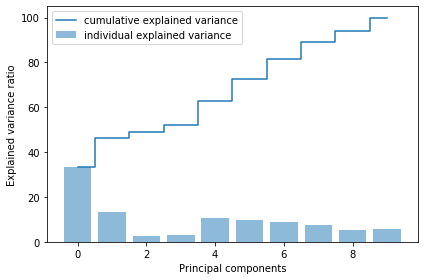

In [37]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))

plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()